### CalcPlasmaBeta
Plasma Betaを計算してみて，より細かい分類ができるかどうかを試してみる

計算ミスってそう...

In [1]:
import MDUS
from MDUS import Analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
result = pd.DataFrame()
orbits = []
datas = []
types = []
xs = []
ys = []
zs = []
rsss = []
nodata = []

for orbit in MDUS.orbit.index:
    # if not (orbit == 199 or orbit == 12):
    #     continue
    print("\033[31m orbit \033[0m", orbit)
    data = MDUS.ScanData()
    data.Input(orbit=orbit)

    if data.value is None or len(data.value[MDUS.EQTAB[-1]].values) == 0 or orbit in nodata:
        print("No data...")
        continue

    data.DataIntegration()
    data.MLAT()
    data.NTP()

    if orbit in MDUS.dip.index:
        dt = np.abs(data.value["MLAT"]).idxmin()
        ds = MDUS.dip.query('index == @orbit')['start'].values[0]
        de = MDUS.dip.query('index == @orbit')['end'].values[0]
        diptype = MDUS.diptype.query('index == @orbit')['type'].values[0]
    else:
        dt = np.abs(data.value["MLAT"]).idxmin()
        ds = dt - pd.Timedelta(minutes=5)
        de = dt + pd.Timedelta(minutes=5)
        diptype = "none"  

    xs.append(data.value.query('index == @dt')["X_MSO"].values[0])
    ys.append(data.value.query('index == @dt')["Y_MSO"].values[0])
    zs.append(data.value.query('index == @dt')["Z_MSO"].values[0])
    orbits.append(orbit)
    types.append(diptype)
    rsss.append(MDUS.Mercury.query('index == @orbit')['Rss'].values[0])
    
    tmp = data.value.query('@ds <= index <= @de')['P'].values * 1e-6 / ((data.value.query('@ds <= index <= @de')['|B|'].values * 1e-6)**2 / (2 * MDUS.mu0))
    
    datas.append(np.nanmean(tmp))

    print("Done!")
    # break
result = result.dropna()
result['orbit'] = orbits
result['beta'] = datas
result['X'] = xs
result['Y'] = ys
result['Z'] = zs
result['type'] = types
result['Rss'] = rsss
result = result.set_index('orbit')
result.to_pickle("./data/other/PlasmaBetaAverage.pkl")   
      

 orbit  12
Done!
 orbit  13
Done!
 orbit  14
Done!
 orbit  15
Done!
 orbit  16
Done!
 orbit  17
Done!
 orbit  18
Done!
 orbit  19
Done!
 orbit  20
Done!
 orbit  21
Done!
 orbit  22
Done!
 orbit  23
Done!
 orbit  24
Done!
 orbit  25
Done!
 orbit  26
Done!
 orbit  27
Done!
 orbit  28
Done!
 orbit  29
No data...
 orbit  30
Error: /data/togawa/messenger/fips/cdr/scan/2011_092_proton.pkl is not found
No data...
 orbit  31
Error: /data/togawa/messenger/fips/cdr/scan/2011_092_proton.pkl is not found
No data...
 orbit  32
Error: /data/togawa/messenger/fips/cdr/scan/2011_093_proton.pkl is not found
No data...
 orbit  33
Error: /data/togawa/messenger/fips/cdr/scan/2011_093_proton.pkl is not found
No data...
 orbit  34
No data...
 orbit  35
No data...
 orbit  38
Done!
 orbit  39


/tmp/ipykernel_62579/2553330301.py:46: RuntimeWarning: Mean of empty slice
  datas.append(np.nanmean(tmp))


Done!
 orbit  40
Done!
 orbit  41
Done!
 orbit  42
Done!
 orbit  43
Done!
 orbit  44
Done!
 orbit  45
Done!
 orbit  46
Done!
 orbit  47
Done!
 orbit  48
Done!
 orbit  49
Done!
 orbit  50
Done!
 orbit  51
Done!
 orbit  52
Done!
 orbit  53
Done!
 orbit  54
Done!
 orbit  55
Done!
 orbit  56
Done!
 orbit  57
Done!
 orbit  58
Done!
 orbit  59
Done!
 orbit  60
Done!
 orbit  61
Done!
 orbit  62
Done!
 orbit  63
Done!
 orbit  64
Done!
 orbit  65
Done!
 orbit  66
Done!
 orbit  67
Done!
 orbit  68
Done!
 orbit  69
Done!
 orbit  70
Done!
 orbit  71
Done!
 orbit  72
Done!
 orbit  73
Done!
 orbit  74
Done!
 orbit  75
Done!
 orbit  76
Done!
 orbit  77
Done!
 orbit  78
Done!
 orbit  79
Done!
 orbit  80
Done!
 orbit  81
Done!
 orbit  82
Done!
 orbit  83
Done!
 orbit  84
Done!
 orbit  85
Done!
 orbit  86
Done!
 orbit  87
Done!
 orbit  88
Done!
 orbit  89
Done!
 orbit  90
Done!
 orbit  91
Done!
 orbit  92
Done!
 orbit  93
Done!
 orbit  94
Done!
 orbit  95
Done!
 orbit  96
Done!
 orbit  97
Done!
 orbit  

In [ ]:
result = pd.read_pickle("./data/other/PlasmabetaAverage.pkl")

Text(0.5, 0, 'Beta')

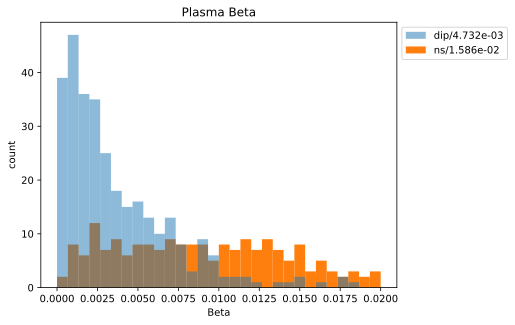

In [38]:
fig, ax = plt.subplots()
ax.set_title("Plasma Beta")
Ttmp = result.query('type == "dip"')['beta']
ax.hist(x=Ttmp,bins=30,range=(0,0.02),zorder=2,label='dip/'+'{:.3e}'.format(np.mean(Ttmp)),alpha=0.5)

Ttmp = result.query('type == "ns"')['beta']
ax.hist(x=Ttmp,bins=30,range=(0,0.02),zorder=1,label='ns/'+'{:.3e}'.format(np.mean(Ttmp)),alpha=1)

Ttmp = result.query('type == "none"')['beta']
# ax.hist(x=Ttmp,bins=30,range=(0,0.01),zorder=0,label='none/'+'{:.3e}'.format(np.mean(Ttmp)),alpha=1)

ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax.set_ylabel('count')
ax.set_xlabel('Beta')
# plt.tight_layout()
# plt.savefig("./figure/flux/TemperatureAverage_all.png",dpi=400)

In [37]:
print(result.query('index == 199')['beta'].values[0])
print(result.query('index == 200')['beta'].values[0])
print(result.query('index == 201')['beta'].values[0])

0.011440037861960845
0.0004860528405882968
0.0009976704588747088
